# Statistical Analysis : Is Getting Insurance Increase the Number of Car Accident?
### by: Dorine Ernst

## Overview:

During the summer, I took Financial Actuarial class where my professor states an interesting fact. He said that driver who has insurance tends to have more car accident than the one without insurance. It is based on the psychology since usually the driver who has insurance think someone will cover the bill. Based on that background, I want to prove whether my professor argument is valid or not using datasets. 

To answer this question, I will carry-on the data analysis using linear regression. In order to make a better model, I added another variable which is whether "the person has previous accidents or not". We will carry on this using t-test statistics and conclude the results.

## Question :
Is there any relationship between having no previous accident and having insurance to getting car accident?

## Hypothesis :
H0 : There is no relationship between having no previous accident and getting insurance with having car accident

Ha : There is a relationship between having no previous accident and getting insurance with having car accident

In [1]:
##importing packages:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import statsmodels.api as sm
import patsy
from patsy import dmatrices
import analysis_function as af 
import test_function as test

In [2]:
#testing all of the function with test_list as input argument
test_list = [1, 2, 3]

In [3]:
#test get_mean function
test.test_get_mean(test_list)

get mean function works!


In [4]:
#test get_variance function
test.test_get_variance(test_list)

get variance function works!


In [5]:
#test get_stdev function
test.test_get_stdev(test_list)

get stdev function works!


In [6]:
#Import dataset
dataset = pd.read_csv('car_crashes.csv')
dataset.head()


,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [7]:
#Slicing the columns we need
fixed_df = dataset[['total', 'no_previous', 'ins_premium']]

fixed_df.head()

,total,no_previous,ins_premium
0,18.8,15.040,784.55
1,18.1,17.014,1053.48
2,18.6,17.856,899.47
3,22.4,21.280,827.34
4,12.0,10.680,878.41


In [8]:
#Looking how many columns and row the data has
fixed_df.shape

(51, 3)

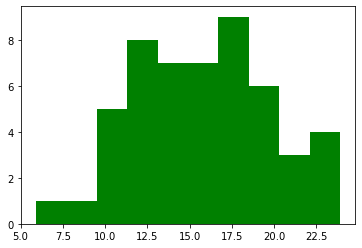

<Figure size 432x288 with 0 Axes>

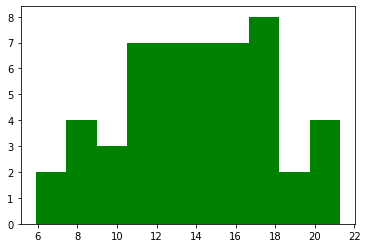

<Figure size 432x288 with 0 Axes>

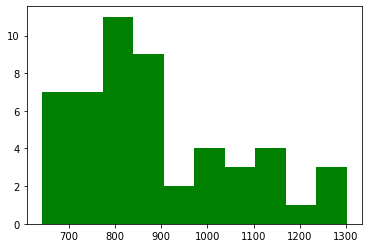

<Figure size 432x288 with 0 Axes>

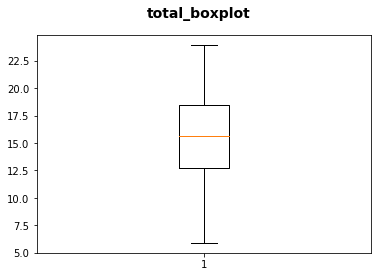

<Figure size 432x288 with 0 Axes>

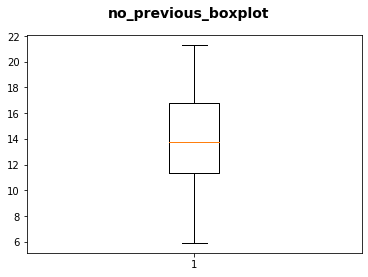

<Figure size 432x288 with 0 Axes>

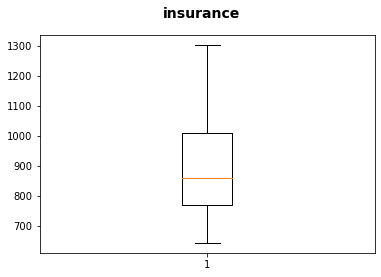

In [9]:
#importing for loop that is stored in script
#looking at histogram distribution
import script_viz as sv

In [10]:
#calculating mean of total accident using mean function from the module
mean = af.get_mean(fixed_df['total'])
print(mean)

15.79019607843137


In [11]:
#calculating mean of not having previous accident using mean function from the module
mean = af.get_mean(fixed_df['no_previous'])
print(mean)

14.004882352941172


In [12]:
#calculating mean of insurance premium using mean function from the module
mean = af.get_mean(fixed_df['ins_premium'])
print(mean)

886.9576470588232


In [13]:
#calculating variance of total accident using variance function from the module
variance = af.get_variance(fixed_df['total'])
print(variance)

16.657747020376778


In [14]:
#calculating variance of not having previous accident using variance function from the module
variance = af.get_variance(fixed_df['no_previous'])
print(variance)

13.894857358708187


In [15]:
#calculating variance of insurance premium using variance function from the module
variance = af.get_variance(fixed_df['ins_premium'])
print(variance)

31166.2403630911


In [16]:
#calculating standard deviation of total accident using standard deviation function from the module
std_dev = af.get_stdev(fixed_df['total'])
print(std_dev)

4.081390329333471


In [17]:
#calculating standard deviation of not having previous accident using standard deviation function from the module
std_dev = af.get_stdev(fixed_df['no_previous'])
print(std_dev)

3.7275806307453885


In [18]:
#calculating standard deviation of insurance premium using standard deviation function from the module
std_dev = af.get_stdev(fixed_df['ins_premium'])
print(std_dev)

176.5396283078989


In [19]:
#running linear regression
outcome, predictors = patsy.dmatrices('total ~ no_previous + ins_premium', fixed_df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     264.5
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           1.21e-26
Time:                        16:06:56   Log-Likelihood:                -80.685
No. Observations:                  51   AIC:                             167.4
Df Residuals:                      48   BIC:                             173.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.2950      1.170      1.961      

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


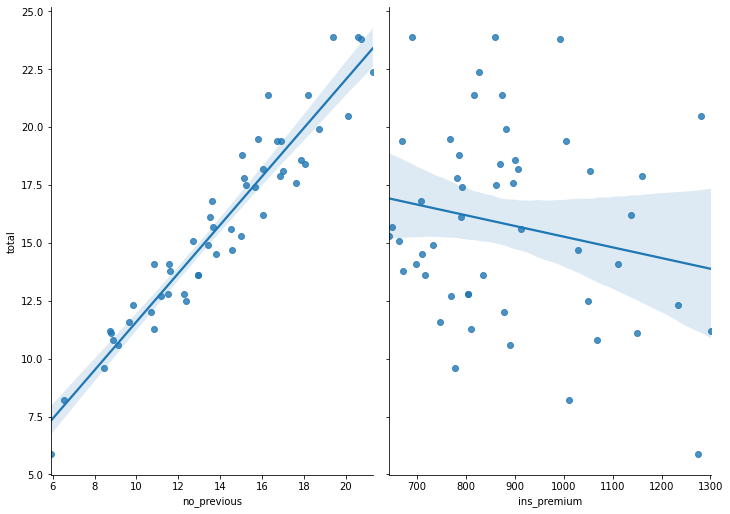

In [20]:
#vizualizing ordinary linear regression
#looking at how the linear regression fall in our data
sns.pairplot(fixed_df, x_vars=['no_previous','ins_premium'], y_vars='total', size=7, aspect=0.7, kind='reg')

From the graph above we can see that our model for having no previous accident is pretty good with small variance,
while for the insurance premium the variance is pretty big

### From linear regression, we have model equation:
Total = 8.6286 + 1.0393 * no_previous - 2.5153 * ins_premium_log_base_10

The model above explains as the driver has no previous accident increased by 1% , it will increase the total car accident by 1.0393, holding other thing constant under ceteris paribus assumption

The model above explains as the driver has insurance increased by 1% , it will decrease the total car accident by 2.5153, holding other thing constant under ceteris paribus assumption

## Further Explanation :
After we run the linear regression above, we can see the adjusted R-squared is 0.913. It means that 91.3% of the data is explained by the model and 8.7% in left unexplained. This is a pretty good model because we can see that most of the data is explained by the model. The rest 8.7% is left unexplained because there are other variable that can cause car accidents such as whether the driver has enough rest, the road maybe is slippery or has sharp turn, or maybe during raining time it has higher car accident.

## Conclusion :

Based on the result above, we do not have enough evidence to accept the H0. Hence we reject H0 and accept Ha. We conclude that:
There is a relationship between having no previous accident and getting insurance with car accidents.

## Extra Credit:
1. I have used Python before in Cogs 108. But since I never learn Python before Cogs 108 and it was moving rapidly, I am taking this class to learn deeper about Python
2. I am using som packages, linear regression, and some vizualization that are not taught in class so that is easier to vizualise.